# Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import KNNImputer


# First Glance

In [15]:
df = pd.read_csv("../data/car_price_prediction.csv")
df.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [16]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [17]:
df.shape

(19237, 18)

In [18]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [20]:
df_clean = df.drop_duplicates()
df_clean.shape

(18924, 18)

In [21]:
df_clean = df_clean.drop(columns="ID")

# Null values

In [22]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [23]:
df_clean['Levy'] = df_clean['Levy'].replace('-', np.nan)
df_clean['Levy'] = df_clean['Levy'].astype(float)
impute = KNNImputer(n_neighbors=5)
df_clean['Levy'] = impute.fit_transform(df_clean['Levy'].values.reshape(-1,1))
df_clean['Levy']

0        1399.000000
1        1018.000000
2         906.299205
3         862.000000
4         446.000000
            ...     
19232     906.299205
19233     831.000000
19234     836.000000
19235    1288.000000
19236     753.000000
Name: Levy, Length: 18924, dtype: float64

# Outliers

In [24]:
price_column = df_clean['Price']

# Calculate the IQR (Interquartile Range)
Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
df_no_outliers = df_clean[~outliers]
df_clean = df_no_outliers

Number of outliers: 1055


In [25]:
df_clean.shape

(17869, 17)

In [26]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Variables

### Mileage

In [27]:
df_clean['Mileage'] = df_clean['Mileage'].str.split(' ', expand=True)[0]
df_clean['Mileage'] = df_clean['Mileage'].astype('float64')

### Doors

In [28]:
df_clean['Doors'].value_counts()

Doors
04-May    17028
02-Mar      729
>5          112
Name: count, dtype: int64

In [29]:
mapping = {'02-Mar': 2,'04-May': 4 , '>5' : 6}

# Apply the mapping to the "doornumber" column using the `replace` method
df_clean['Doors'] = df_clean['Doors'].replace(mapping)
df_clean['Doors'] = df_clean['Doors'].astype('category')

C:\Users\aleta\AppData\Local\Temp\ipykernel_28180\2015285999.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Doors'] = df_clean['Doors'].replace(mapping)


### Category

In [30]:
df_clean['Category'].value_counts()

Category
Sedan          8318
Jeep           4736
Hatchback      2781
Minivan         620
Coupe           477
Universal       339
Microbus        290
Goods wagon     227
Pickup           41
Cabriolet        29
Limousine        11
Name: count, dtype: int64

### Leather Interior

In [31]:
mapping = {'Yes': 1, 'No': 0}
df_clean['Leather interior'] = df_clean['Leather interior'].replace(mapping)
df_clean['Leather interior'] = df_clean['Leather interior'].astype('category')

C:\Users\aleta\AppData\Local\Temp\ipykernel_28180\1666266376.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Leather interior'] = df_clean['Leather interior'].replace(mapping)


### Model

In [32]:
df_clean['Model'].value_counts()

Model
Prius                     1068
Sonata                    1007
Elantra                    907
Camry                      905
E 350                      526
                          ... 
Golf 2                       1
GLK 300                      1
Musa                         1
1500,1600 Schtufenheck       1
Prius C aqua                 1
Name: count, Length: 1498, dtype: int64

### Manufacturer

In [33]:
df_clean['Manufacturer'].value_counts()

Manufacturer
TOYOTA           3502
HYUNDAI          3425
MERCEDES-BENZ    1874
FORD             1035
CHEVROLET        1021
                 ... 
PONTIAC             1
LANCIA              1
FERRARI             1
HAVAL               1
GREATWALL           1
Name: count, Length: 61, dtype: int64

### Fuel Type

In [34]:
df_clean['Fuel type'].value_counts()

Fuel type
Petrol            9309
Diesel            3634
Hybrid            3495
LPG                878
CNG                469
Plug-in Hybrid      83
Hydrogen             1
Name: count, dtype: int64

### Drive Wheels

In [35]:
df_clean['Drive wheels'].value_counts()

Drive wheels
Front    12155
4x4       3589
Rear      2125
Name: count, dtype: int64

### Color

In [36]:
df_clean['Color'].value_counts()

Color
Black            4554
White            4143
Silver           3628
Grey             2167
Blue             1314
Red               606
Green             319
Orange            248
Carnelian red     173
Brown             168
Golden            139
Beige             130
Sky blue          121
Yellow             96
Purple             39
Pink               24
Name: count, dtype: int64

### Engine Volume

In [37]:
df_clean['Engine volume'].value_counts()

Engine volume
2            3573
2.5          2167
1.8          1742
1.6          1428
1.5          1248
             ... 
4.2 Turbo       1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 103, dtype: int64

In [38]:
# I will make a new column that has two values (Turbo, Not turbo) and turn Engine volume into a numerical column
temp = df_clean['Engine volume'].str.split(" ", expand=True)
temp = temp.fillna('Non-Turbo')
mapping = {'Turbo': 1, 'Non-Turbo': 0}
temp[1] = temp[1].replace(mapping).astype('category')
temp[0] = temp[0].astype('float64')
df_clean['Engine volume'] = temp[0]
df_clean['Turbo'] = temp[1]

C:\Users\aleta\AppData\Local\Temp\ipykernel_28180\4045925351.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp[1] = temp[1].replace(mapping).astype('category')


# Recap

In [39]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,906.299205,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [40]:
df_clean.shape

(17869, 18)

# EDA

C:\Users\aleta\AppData\Local\Temp\ipykernel_28180\2683895528.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_data = df_clean.groupby(column)['Price'].mean().sort_values(ascending=False).index
C:\Users\aleta\AppData\Local\Temp\ipykernel_28180\2683895528.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_data = df_clean.groupby(column)['Price'].mean().sort_values(ascending=False).index


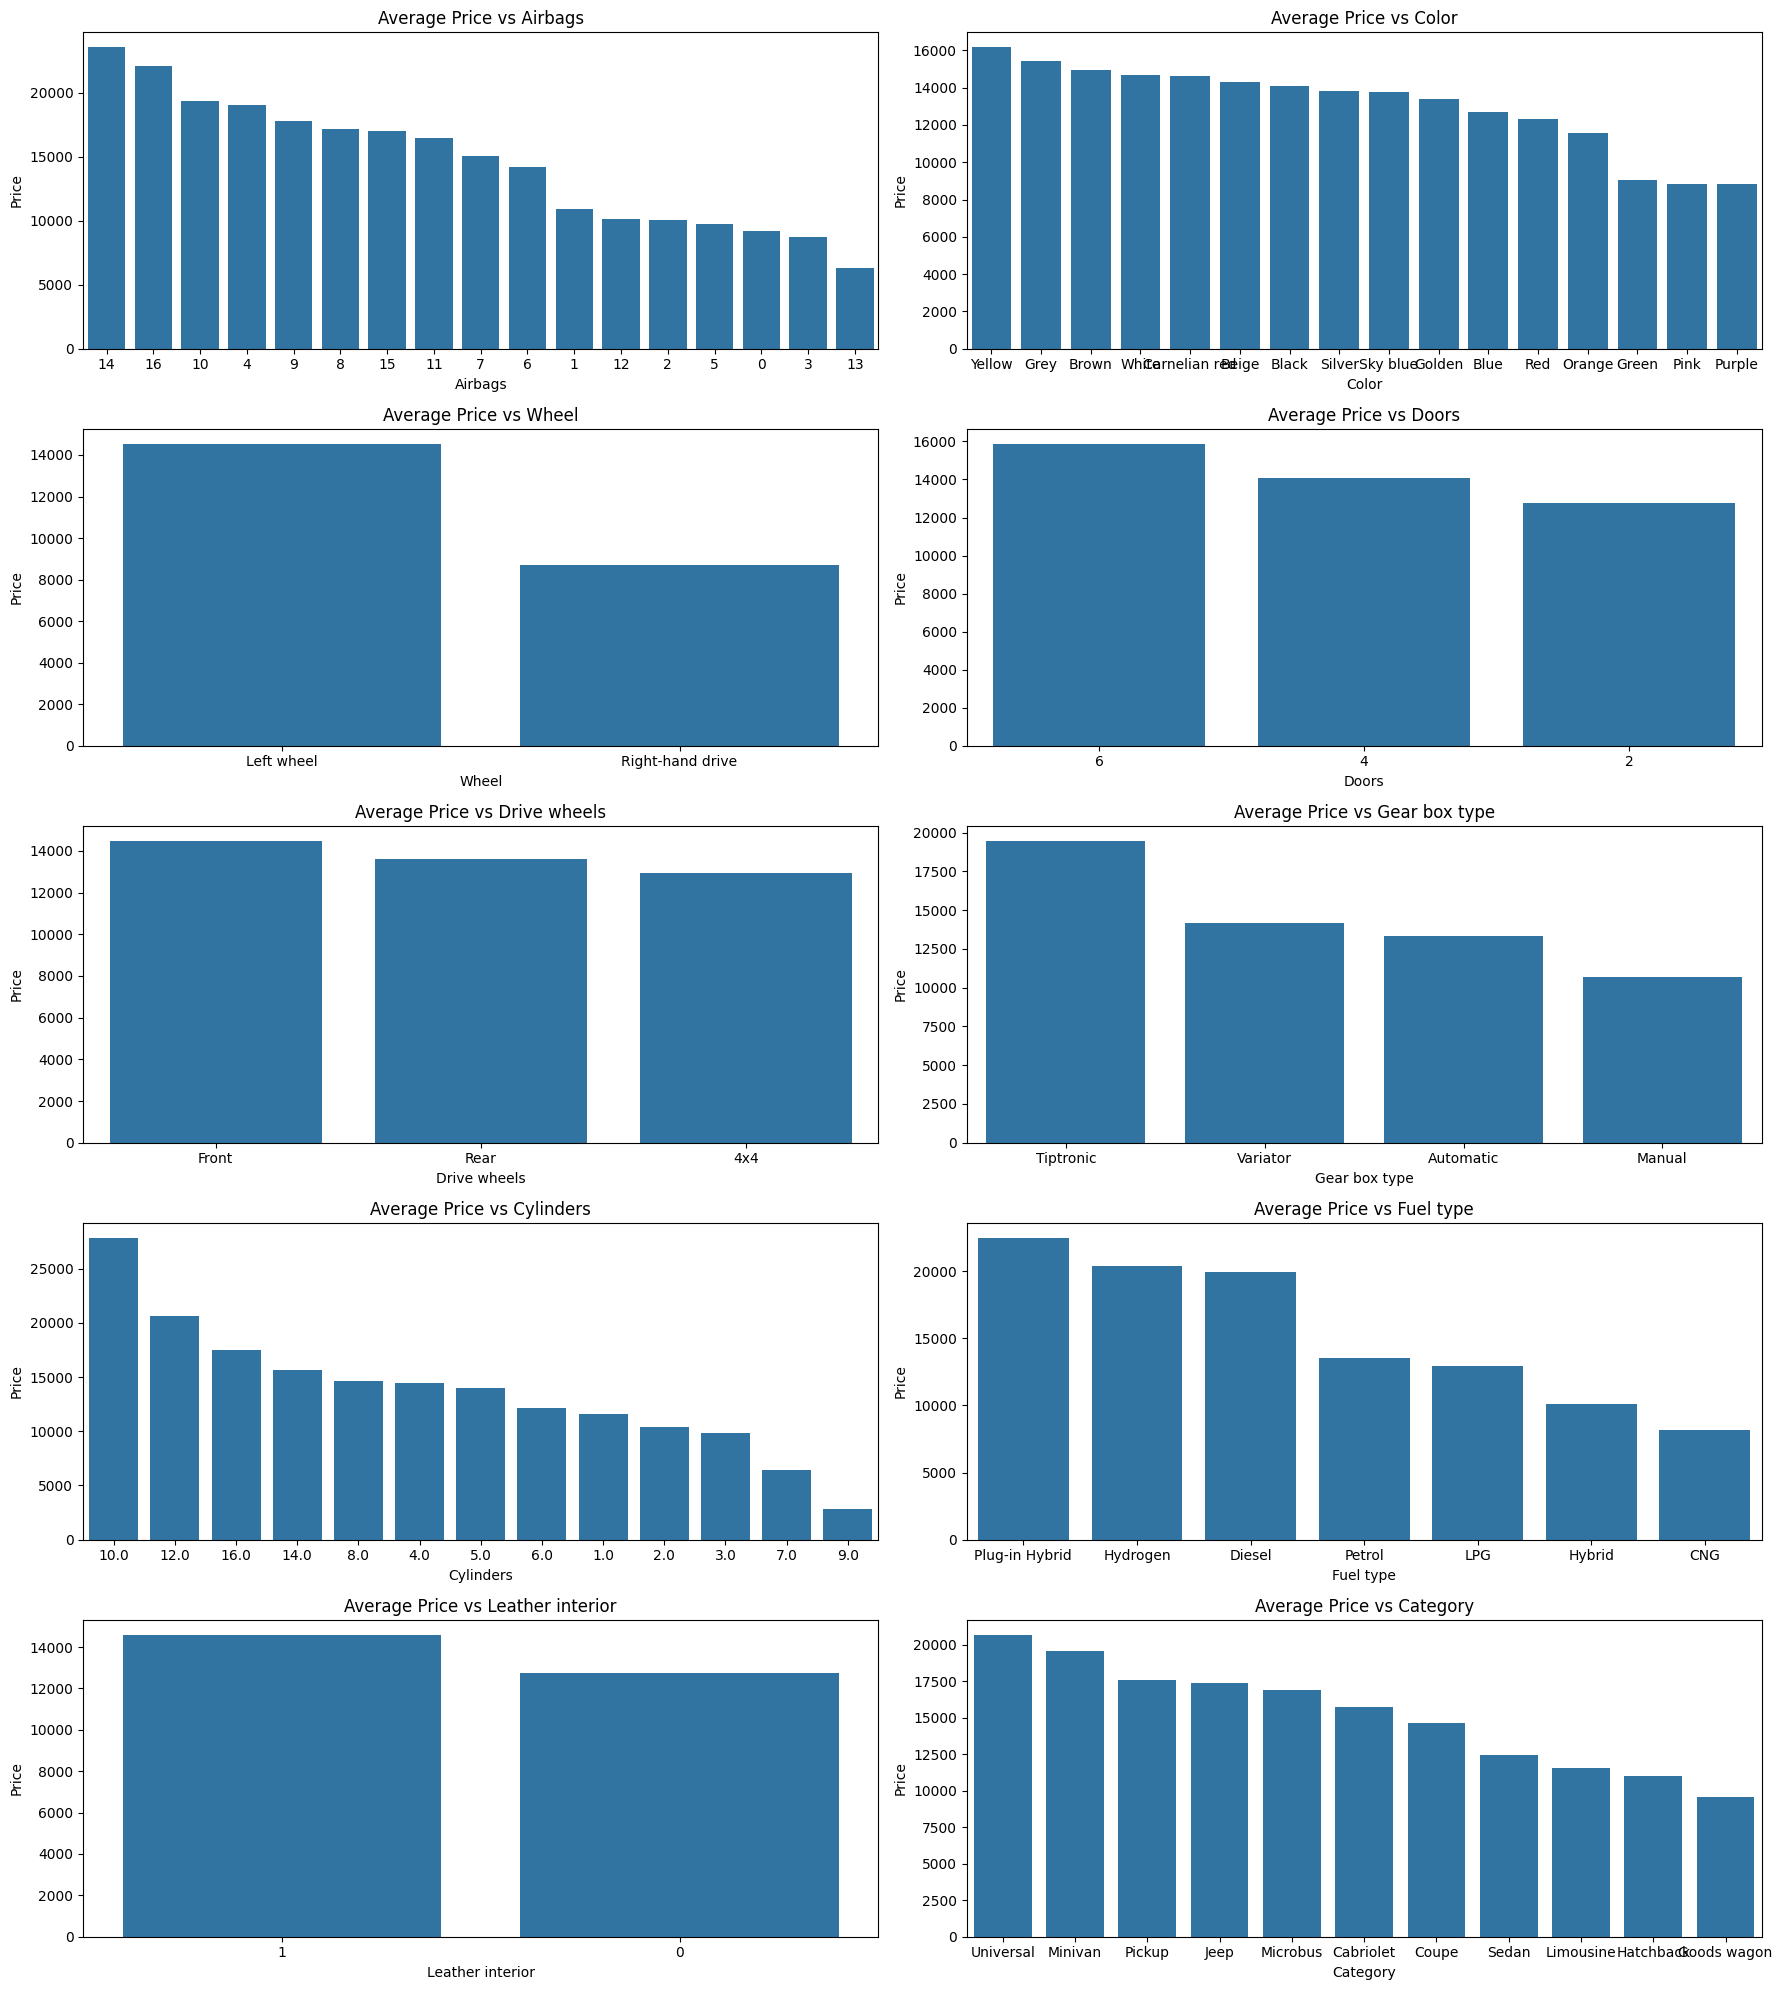

In [41]:
columns_to_plot = ['Airbags', 'Color', 'Wheel', 'Doors', 'Drive wheels', 'Gear box type', 'Cylinders', 'Fuel type', 'Leather interior', 'Category']

# Create a 5x2 subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    # Sort the data by the average price in descending order
    sorted_data = df_clean.groupby(column)['Price'].mean().sort_values(ascending=False).index
    
    sns.barplot(x=column, y='Price', data=df_clean, order=sorted_data, ax=axes[i], errorbar=None)
    axes[i].set_title(f'Average Price vs {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
df_clean['Prod. year'].head()

0    2010
1    2011
2    2006
3    2011
4    2014
Name: Prod. year, dtype: int64

In [43]:
# It is better to have the age of the car instead of the production year
df_clean['Age'] = 2024 - df_clean['Prod. year']
df_clean = df_clean.drop(columns=['Prod. year'])
df_clean.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
0,13328,1399.000000,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0,14
1,16621,1018.000000,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0,13
2,8467,906.299205,HONDA,FIT,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0,18
3,3607,862.000000,FORD,Escape,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0,13
4,11726,446.000000,HONDA,FIT,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0,10


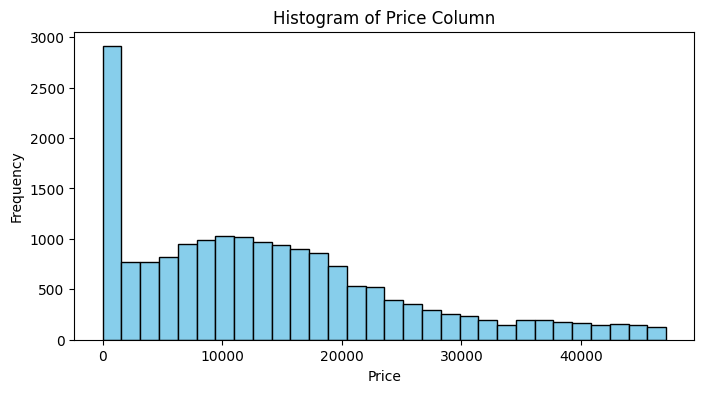

In [44]:
# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(df_clean['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [45]:
# We can see many cars have a price less than 500 which is unrealistic so we will remove these
df_clean = df_clean[df_clean['Price'] >= 500]

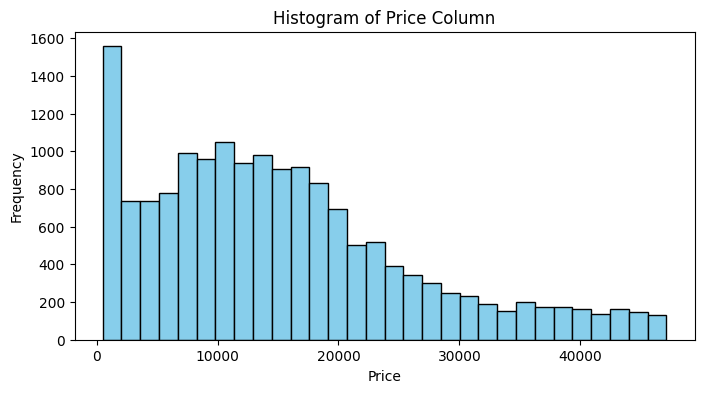

In [46]:
plt.figure(figsize=(8, 4))
plt.hist(df_clean['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

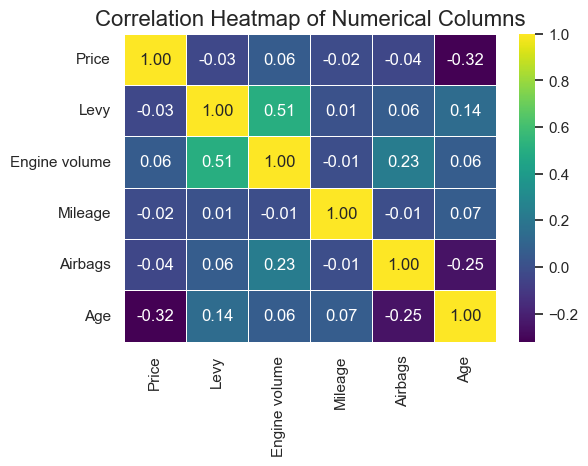

In [47]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()

There seems to be no multicollinearity in the data

# Feature Outliers

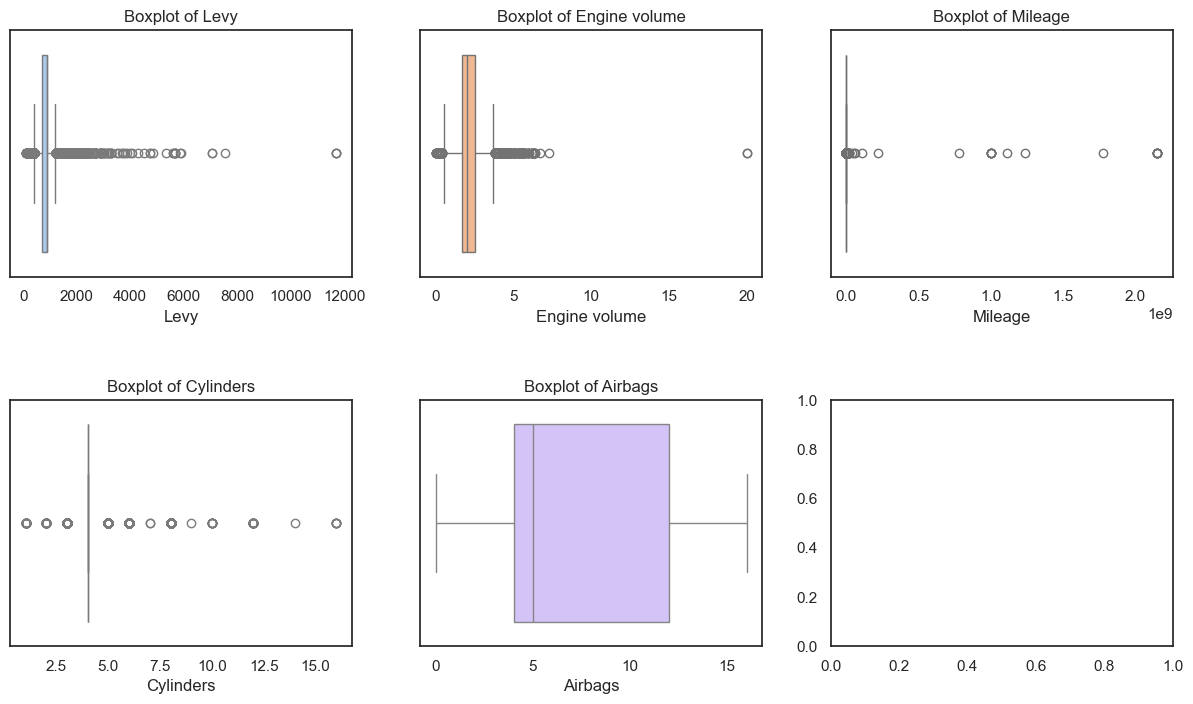

In [49]:
# List of columns for boxplots
columns_for_boxplots = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define a colorful palette for the boxplots
color_palette = sns.color_palette("pastel")

# Create boxplots for each column
for i, column in enumerate(columns_for_boxplots):
    sns.boxplot(x=df_clean[column], ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.show()

In [50]:
# Remove outliers
# List of columns to check for outliers
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders'] # Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_cleaned, outlier_count

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    df_clean, count = remove_outliers_iqr(df_clean, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 2302
Engine volume: 292
Mileage: 529
Cylinders: 2321


# Encoding

Leaveoneout encoding for Manufacturer, Model and Category. Rest is one hot encoded (manufacturer, model and category have too many categories)

In [51]:
# Select the columns to be encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
df_encoded = encoder.fit_transform(df_clean[columns_to_encode], df_clean['Price'])

# Concatenate the encoded columns with the original DataFrame
df_clean = pd.concat([df_clean, df_encoded.add_suffix('_LOO')], axis=1)

In [52]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age,Manufacturer_LOO,Model_LOO,Category_LOO
2,8467,906.299205,HONDA,FIT,Hatchback,0,Petrol,1.3,200000.0,4.0,...,Front,4,Right-hand drive,Black,2,0,18,13127.213716,13694.879004,12811.045502
3,3607,862.000000,FORD,Escape,Jeep,1,Hybrid,2.5,168966.0,4.0,...,4x4,4,Left wheel,White,0,0,13,14542.676514,12630.410959,22553.778054
4,11726,446.000000,HONDA,FIT,Hatchback,1,Petrol,1.3,91901.0,4.0,...,Front,4,Left wheel,Silver,4,0,10,13122.015949,13683.281139,12809.360393
5,39493,891.000000,HYUNDAI,Santa FE,Jeep,1,Diesel,2.0,160931.0,4.0,...,Front,4,Left wheel,White,4,0,8,20625.255073,31222.115727,22538.918427
6,1803,761.000000,TOYOTA,Prius,Hatchback,1,Hybrid,1.8,258909.0,4.0,...,Front,4,Left wheel,White,12,0,14,15194.137579,13908.169188,12814.491210


In [53]:
df_clean.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)
df_clean.head()

,Price,Levy,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age,Manufacturer_LOO,Model_LOO,Category_LOO
2,8467,906.299205,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0,18,13127.213716,13694.879004,12811.045502
3,3607,862.000000,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0,13,14542.676514,12630.410959,22553.778054
4,11726,446.000000,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0,10,13122.015949,13683.281139,12809.360393
5,39493,891.000000,1,Diesel,2.0,160931.0,4.0,Automatic,Front,4,Left wheel,White,4,0,8,20625.255073,31222.115727,22538.918427
6,1803,761.000000,1,Hybrid,1.8,258909.0,4.0,Automatic,Front,4,Left wheel,White,12,0,14,15194.137579,13908.169188,12814.491210


In [54]:
columns_to_encode = df_clean.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
df_clean = pd.get_dummies(df_clean, columns=columns_to_encode, drop_first=True)

df_clean.head()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_1
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,False,False,False,False,False,False,False,True,False,False
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,False,False,False,False,False,True,False,False,False,False
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,False,False,False,False,False,False,False,True,False,False
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,False,False,False,False,False,False,False,True,False,False


In [55]:
# Loop through columns
for column in df_clean.columns:
    # Check if the column contains boolean values (True/False)
    if df_clean[column].dtype == bool:
        # Replace True with 1 and False with 0
        df_clean[column] = df_clean[column].astype(int)

In [56]:
df_clean.head()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_1
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,0,0,0,0,0,0,0,1,0,0
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,0,0,0,0,0,1,0,0,0,0
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,0,0,0,0,0,0,0,1,0,0
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Separate the target variable (Price) and independent variables
X = df_clean.drop(columns=['Price','Cylinders'])
y = df_clean['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the evaluation data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}


# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predictions on the scaled training set
y_train_pred = model.predict(X_train_scaled)

# Predictions on the scaled evaluation set
y_eval_pred = model.predict(X_test_scaled)

# Calculate MAE and R-squared for training and evaluation sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_eval = mean_absolute_error(y_test, y_eval_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_eval = r2_score(y_test, y_eval_pred)

# Append results to the dictionary
results['Model'].append('RandomForestRegressor')
results['MAE (Train)'].append(mae_train)
results['MAE (Test)'].append(mae_eval)
results['R-squared (Train)'].append(r2_train)
results['R-squared (Test)'].append(r2_eval)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForestRegressor,122.098802,343.787922,0.997101,0.983859


In [58]:
with open('../assets/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('../assets/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('../assets/encoder.pkl', 'wb') as model_file:
    pickle.dump(encoder, model_file)